In [1]:
pip install pandas matplotlib ta python-binance


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta
from binance.client import Client
import time
from datetime import datetime, timedelta

print("libraries import.")



libraries import.


In [3]:
api_key = ''
api_secret = ''



client = Client(api_key, api_secret)

print("Binance client initialized.")





Binance client initialized.


In [4]:
from datetime import datetime, timedelta, timezone

def fetch_data(symbol, interval):
    """Fetch the last 2 months of historical data."""
    start_date = (datetime.now(timezone.utc) - timedelta(days=60)).strftime('%Y-%m-%d %H:%M:%S')
    
    klines = client.get_historical_klines(symbol, interval, start_date)
    
    df = pd.DataFrame(klines, columns=[
        'Open Time', 'Open', 'High', 'Low', 'Close', 'Volume',
        'Close Time', 'Quote Asset Volume', 'Number of Trades',
        'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore'
    ])
    
    df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
    df.set_index('Open Time', inplace=True)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)
    
    return df

eth_5m = fetch_data('ETHUSDT', Client.KLINE_INTERVAL_5MINUTE)
eth_1h = fetch_data('ETHUSDT', Client.KLINE_INTERVAL_1HOUR)

print(eth_5m.tail())
print(eth_1h.tail())


                        Open     High      Low    Close     Volume
Open Time                                                         
2024-10-15 20:15:00  2590.25  2590.26  2580.49  2582.58  1128.2176
2024-10-15 20:20:00  2582.57  2583.00  2571.23  2578.80  2655.8498
2024-10-15 20:25:00  2578.79  2581.00  2572.79  2573.00  1118.4938
2024-10-15 20:30:00  2573.00  2575.00  2564.20  2565.57  1898.0864
2024-10-15 20:35:00  2565.57  2570.33  2563.60  2568.35   809.1537
                        Open     High      Low    Close      Volume
Open Time                                                          
2024-10-15 16:00:00  2573.42  2619.33  2571.36  2592.85  25221.7329
2024-10-15 17:00:00  2592.84  2600.40  2576.00  2582.04  14549.1001
2024-10-15 18:00:00  2582.03  2605.62  2580.49  2592.97  12972.8996
2024-10-15 19:00:00  2592.98  2598.28  2580.12  2592.11  17416.7588
2024-10-15 20:00:00  2592.11  2595.50  2563.60  2568.36   9343.4704


In [5]:
def add_indicators(df):
    """Add technical indicators to the DataFrame."""
    df['RSI'] = ta.momentum.rsi(df['Close'], window=14)
    macd = ta.trend.MACD(df['Close'])
    df['MACD'] = macd.macd()
    df['MACD Signal'] = macd.macd_signal()
    bb = ta.volatility.BollingerBands(df['Close'], window=20, window_dev=2)
    df['BB High'] = bb.bollinger_hband()
    df['BB Low'] = bb.bollinger_lband()
    return df

eth_5m = add_indicators(eth_5m)
eth_1h = add_indicators(eth_1h)

print("\n5-Minute Data with Indicators:")
print(eth_5m.tail())
print("\n1-Hour Data with Indicators:")
print(eth_1h.tail())



5-Minute Data with Indicators:
                        Open     High      Low    Close     Volume        RSI  \
Open Time                                                                       
2024-10-15 20:15:00  2590.25  2590.26  2580.49  2582.58  1128.2176  42.155007   
2024-10-15 20:20:00  2582.57  2583.00  2571.23  2578.80  2655.8498  38.848826   
2024-10-15 20:25:00  2578.79  2581.00  2572.79  2573.00  1118.4938  34.391727   
2024-10-15 20:30:00  2573.00  2575.00  2564.20  2565.57  1898.0864  29.692124   
2024-10-15 20:35:00  2565.57  2570.33  2563.60  2568.35   809.1537  33.361347   

                         MACD  MACD Signal      BB High       BB Low  
Open Time                                                             
2024-10-15 20:15:00 -0.351026    -0.276265  2597.498574  2580.893426  
2024-10-15 20:20:00 -1.152526    -0.451518  2597.256510  2579.447490  
2024-10-15 20:25:00 -2.230026    -0.807219  2598.387327  2576.434673  
2024-10-15 20:30:00 -3.641514    -1.374078  2

In [6]:
def trading_strategy(df):
    """Calculate buy/sell signals based on indicators."""
    df['Signal'] = 0
    for i in range(1, len(df)):
        if df['Close'].iloc[i] < df['BB Low'].iloc[i] and df['RSI'].iloc[i] < 30:
            df['Signal'].iloc[i] = 1  # Buy
            print(f"Buy signal at {df.index[i]}: {df['Close'].iloc[i]} USDT")
        elif df['Close'].iloc[i] > df['BB High'].iloc[i] and df['RSI'].iloc[i] > 70:
            df['Signal'].iloc[i] = -1  # Sell
            print(f"Sell signal at {df.index[i]}: {df['Close'].iloc[i]} USDT")
    return df

eth_5m = trading_strategy(eth_5m)
eth_1h = trading_strategy(eth_1h)


Buy signal at 2024-08-16 23:05:00: 2590.05 USDT
Buy signal at 2024-08-16 23:10:00: 2587.01 USDT
Sell signal at 2024-08-17 13:10:00: 2612.29 USDT
Sell signal at 2024-08-17 17:00:00: 2626.04 USDT
Buy signal at 2024-08-17 21:30:00: 2602.98 USDT
Sell signal at 2024-08-18 00:35:00: 2621.49 USDT
Sell signal at 2024-08-18 00:40:00: 2621.35 USDT
Sell signal at 2024-08-18 00:45:00: 2621.6 USDT
Sell signal at 2024-08-18 02:55:00: 2631.1 USDT
Sell signal at 2024-08-18 08:45:00: 2618.23 USDT
Sell signal at 2024-08-18 08:50:00: 2618.25 USDT
Sell signal at 2024-08-18 09:05:00: 2622.53 USDT
Sell signal at 2024-08-18 09:10:00: 2624.15 USDT
Sell signal at 2024-08-18 09:50:00: 2644.4 USDT
Sell signal at 2024-08-18 09:55:00: 2645.22 USDT
Sell signal at 2024-08-18 10:00:00: 2651.61 USDT
Sell signal at 2024-08-18 10:05:00: 2651.75 USDT
Sell signal at 2024-08-18 10:15:00: 2659.08 USDT
Sell signal at 2024-08-18 12:40:00: 2671.31 USDT
Sell signal at 2024-08-18 13:05:00: 2679.04 USDT
Buy signal at 2024-08-18 1

/var/folders/j9/bmrp6gpx7v5chjzjwzq9fynr0000gn/T/ipykernel_21620/3832682945.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Signal'].iloc[i] = 1  # Buy
/var/folders/j9/bmrp6gpx7v5chjzjwzq9fynr0000gn/T/ipykernel_21620/3832682945.py:6:

In [7]:
def calculate_profit(df):
    """Calculate total profit/loss from trading signals."""
    balance = 10000  # Starting with 10,000 USDT
    eth_balance = 0
    buy_price = 0
    
    for i in range(len(df)):
        if df['Signal'].iloc[i] == 1 and eth_balance == 0:  # Buy
            eth_balance = balance / df['Close'].iloc[i]
            balance = 0
            buy_price = df['Close'].iloc[i]
            print(f"Buying at {buy_price} USDT")
        
        elif df['Signal'].iloc[i] == -1 and eth_balance > 0:  # Sell
            balance = eth_balance * df['Close'].iloc[i]
            eth_balance = 0
            sell_price = df['Close'].iloc[i]
            profit = sell_price - buy_price
            print(f"Selling at {sell_price} USDT, Profit: {profit}")

    total_value = balance + (eth_balance * df['Close'].iloc[-1])
    print(f"Total Value: {total_value} USDT")
    return total_value

total_profit_5m = calculate_profit(eth_5m)
total_profit_1h = calculate_profit(eth_1h)


Buying at 2590.05 USDT
Selling at 2612.29 USDT, Profit: 22.23999999999978
Buying at 2602.98 USDT
Selling at 2621.49 USDT, Profit: 18.509999999999764
Buying at 2646.46 USDT
Selling at 2602.52 USDT, Profit: -43.940000000000055
Buying at 2658.01 USDT
Selling at 2597.98 USDT, Profit: -60.0300000000002
Buying at 2576.35 USDT
Selling at 2601.34 USDT, Profit: 24.990000000000236
Buying at 2562.62 USDT
Selling at 2658.38 USDT, Profit: 95.76000000000022
Buying at 2614.31 USDT
Selling at 2634.99 USDT, Profit: 20.679999999999836
Buying at 2652.41 USDT
Selling at 2691.47 USDT, Profit: 39.059999999999945
Buying at 2756.31 USDT
Selling at 2781.43 USDT, Profit: 25.11999999999989
Buying at 2759.8 USDT
Selling at 2779.5 USDT, Profit: 19.699999999999818
Buying at 2743.07 USDT
Selling at 2698.38 USDT, Profit: -44.690000000000055
Buying at 2676.69 USDT
Selling at 2475.52 USDT, Profit: -201.17000000000007
Buying at 2450.2 USDT
Selling at 2488.29 USDT, Profit: 38.090000000000146
Buying at 2483.81 USDT
Sellin

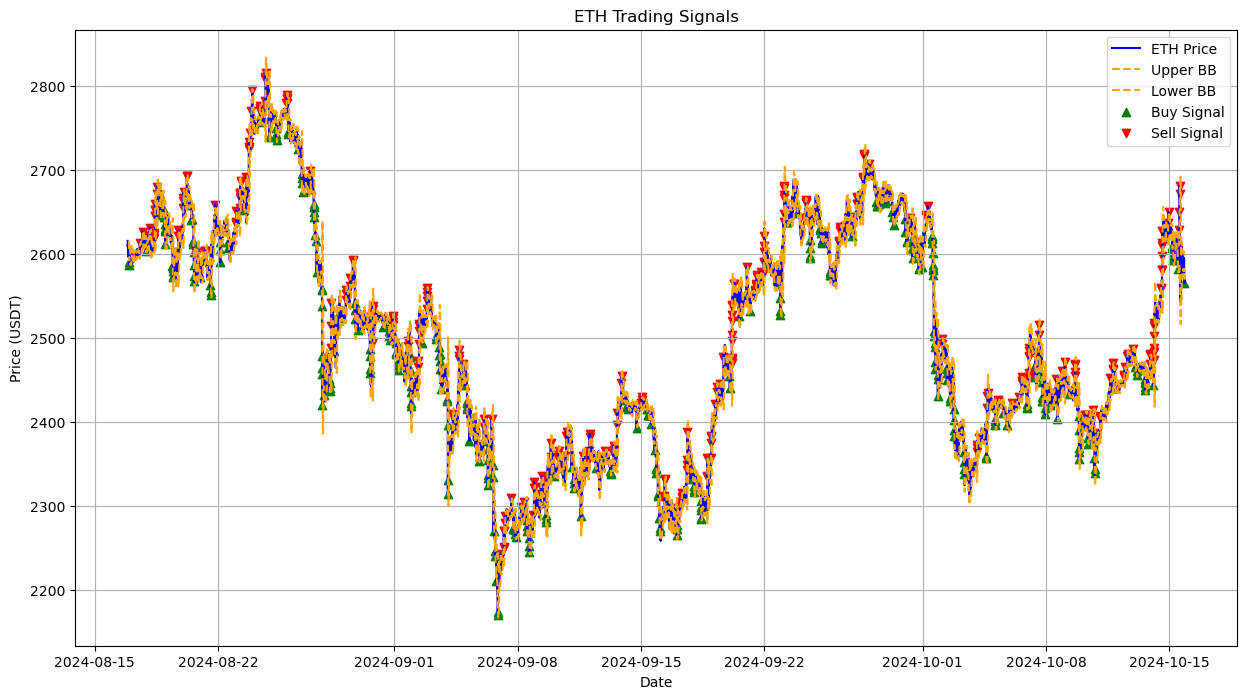

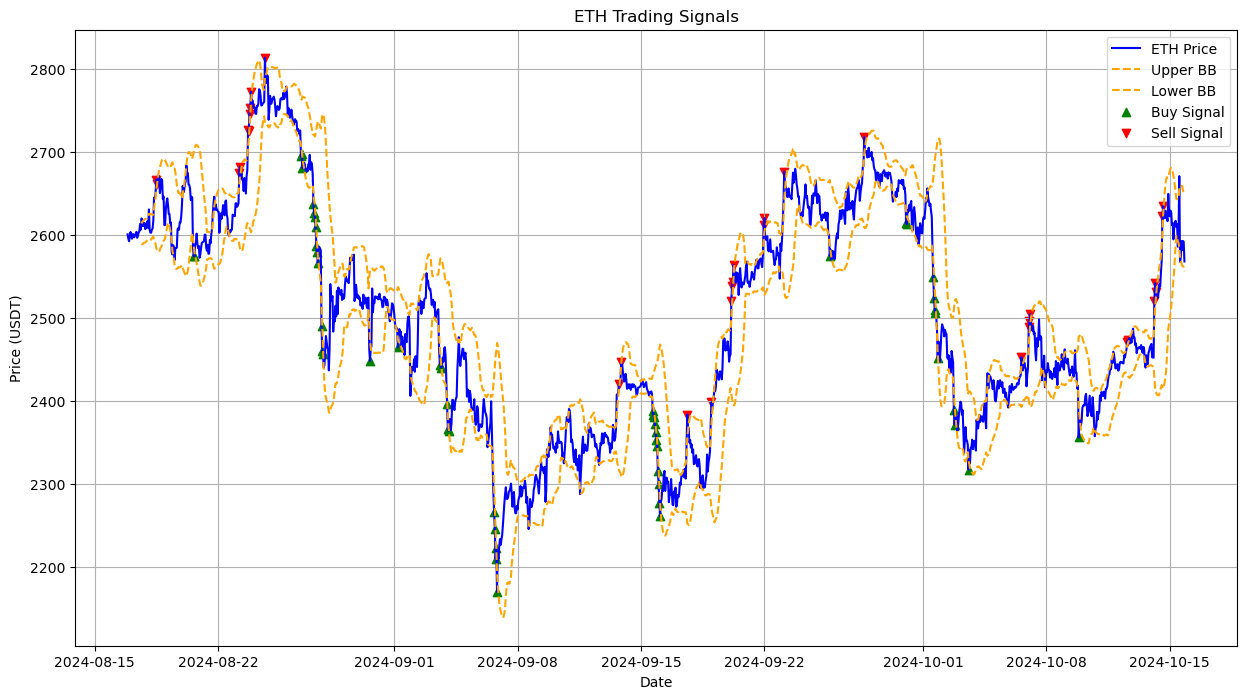

In [8]:
def plot_signals(df):
    """Plot the price data along with buy/sell signals."""
    plt.figure(figsize=(15, 8))
    plt.plot(df.index, df['Close'], label='ETH Price', color='blue')
    plt.plot(df.index, df['BB High'], label='Upper BB', color='orange', linestyle='--')
    plt.plot(df.index, df['BB Low'], label='Lower BB', color='orange', linestyle='--')
    
    buy_signals = df[df['Signal'] == 1]
    sell_signals = df[df['Signal'] == -1]
    
    plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal', alpha=1)
    plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal', alpha=1)
    
    plt.title('ETH Trading Signals')
    plt.xlabel('Date')
    plt.ylabel('Price (USDT)')
    plt.legend()
    plt.grid()
    plt.show()

plot_signals(eth_5m)
plot_signals(eth_1h)


In [9]:
amount_to_invest = 10000   
eth_balance = 0 
state = 0  # 0: 
stop_loss = 0
take_profit = 0
trailing_stop_loss_pct = 0.05   
take_profit_pct = 0.10  
symbol = 'ETHUSDT'

 
trade_log = []

print("Trading parameters initialized.")


Trading parameters initialized.


In [10]:
def get_real_time_indicators(symbol='ETHUSDT'):
    klines = client.get_klines(symbol=symbol, interval='1m', limit=500)
    close_prices = [float(entry[4]) for entry in klines]
    close_series = pd.Series(close_prices)

    # Calculate indicators
    rsi = ta.momentum.rsi(close_series, window=14).iloc[-1]
    macd_line = ta.trend.macd(close_series, window_slow=26, window_fast=12).iloc[-1]
    signal_line = ta.trend.macd_signal(close_series).iloc[-1]
    macd_signal = 'BUY' if macd_line > signal_line else 'SELL'

    bb_upper = close_series.rolling(window=20).mean() + 2 * close_series.rolling(window=20).std()
    bb_lower = close_series.rolling(window=20).mean() - 2 * close_series.rolling(window=20).std()

    return close_prices[-1], rsi, macd_signal, bb_lower.iloc[-1], bb_upper.iloc[-1]


In [ ]:
def test_buy_sell_conditions(curr_price, rsi, macd_signal, lower_band, upper_band):
    buy_signal = rsi < 50 and macd_signal == 'BUY' and curr_price <= lower_band + 1
    sell_signal = rsi > 50 and macd_signal == 'SELL' and curr_price >= upper_band - 1
    return buy_signal, sell_signal

while True:
    # Get real-time data and indicators
    curr_price, rsi, macd_signal, lower_band, upper_band = get_real_time_indicators(symbol)
    print(f'Current Price: {curr_price} | RSI: {rsi:.2f} | MACD: {macd_signal} | Lower: {lower_band:.2f} | Upper: {upper_band:.2f}')

    buy_signal, sell_signal = test_buy_sell_conditions(curr_price, rsi, macd_signal, lower_band, upper_band)

    if state == 0 and buy_signal:
        print(f"BUY at {curr_price} USDT")
        eth_balance = amount_to_invest / curr_price
        stop_loss = curr_price * (1 - trailing_stop_loss_pct)
        take_profit = curr_price * (1 + take_profit_pct)
        state = 1
        amount_to_invest = 0

        trade_log.append({
            'Action': 'BUY',
            'Price': curr_price,
            'ETH': eth_balance,
            'Time': time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime())
        })

    elif state == 1 and (sell_signal or curr_price <= stop_loss or curr_price >= take_profit):
        sell_price = curr_price
        profit = (sell_price * eth_balance) - (eth_balance * stop_loss)
        amount_to_invest = sell_price * eth_balance
        eth_balance = 0
        state = 0

        print(f"SELL at {sell_price} USDT | Profit: {profit:.2f} USDT")
        trade_log.append({
            'Action': 'SELL',
            'Price': sell_price,
            'Profit': profit,
            'Time': time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime())
        })

        stop_loss = 0
        take_profit = 0

    print(f"USDT: {amount_to_invest:.2f} | ETH: {eth_balance:.4f}")
    time.sleep(10) 


Current Price: 2568.36 | RSI: 33.57 | MACD: SELL | Lower: 2563.39 | Upper: 2584.85
USDT: 10000.00 | ETH: 0.0000
Current Price: 2569.5 | RSI: 35.66 | MACD: SELL | Lower: 2563.57 | Upper: 2584.79
USDT: 10000.00 | ETH: 0.0000
Current Price: 2569.91 | RSI: 36.65 | MACD: SELL | Lower: 2563.63 | Upper: 2584.77
USDT: 10000.00 | ETH: 0.0000
Current Price: 2570.0 | RSI: 36.95 | MACD: SELL | Lower: 2563.59 | Upper: 2583.49
USDT: 10000.00 | ETH: 0.0000
Current Price: 2568.61 | RSI: 34.41 | MACD: SELL | Lower: 2563.40 | Upper: 2583.54
USDT: 10000.00 | ETH: 0.0000
Current Price: 2568.58 | RSI: 34.37 | MACD: SELL | Lower: 2563.39 | Upper: 2583.55
USDT: 10000.00 | ETH: 0.0000


In [ ]:
def plot_trade_log(trade_log):
    if not trade_log:
        print("No trades to display.")
        return

    buy_points = [trade for trade in trade_log if trade['Action'] == 'BUY']
    sell_points = [trade for trade in trade_log if trade['Action'] == 'SELL']

    prices = [trade['Price'] for trade in trade_log]
    times = [trade['Time'] for trade in trade_log]

    plt.figure(figsize=(15, 5))
    plt.plot(times, prices, label='Price', alpha=0.5)

    if buy_points:
        plt.scatter([trade['Time'] for trade in buy_points], [trade['Price'] for trade in buy_points], 
                    marker='^', color='g', label='Buy', alpha=1)

    if sell_points:
        plt.scatter([trade['Time'] for trade in sell_points], [trade['Price'] for trade in sell_points], 
                    marker='v', color='r', label='Sell', alpha=1)

    plt.title('Buy/Sell Signals')
    plt.xlabel('Time')
    plt.ylabel('Price (USDT)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_trade_log(trade_log)
